<a href="https://colab.research.google.com/github/DemianVL18/Analisis-de-Datos/blob/main/Random_Forest_y_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arboles de Decisión y Random Forest**

Utilizaremos un dataset, el cual se encuentra en el siguiente URL: [Sample-Data-Mushroom-Classification.csv](https://raw.githubusercontent.com/cjramirezt/mushrooms/main/Sample-Data-Mushroom-Classification.csv).

**1. Importar librerias y Cargar DataSet**

In [1]:
# Librerías para análisis de datos y visualización
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Herramientas para preprocesamiento y división de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import tree

# Visualización de gráficos en notebooks (útil si se trabaja en Jupyter)
%matplotlib inline

# Carga del dataset de hongos desde una URL
df = pd.read_csv("https://raw.githubusercontent.com/cjramirezt/mushrooms/main/Sample-Data-Mushroom-Classification.csv")

# Vista previa de los datos
df.head()

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,Class
0,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,1,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,...,white,white,partial,white,1,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,1,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,1,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,...,white,white,partial,white,1,evanescent,brown,abundant,grasses,edible


**2. Separar las variable predictoras y objetivo (Denominelas X e y respectivamente)**

In [2]:
# Muestra el nombre de todas las columnas del dataset
df.columns

Index(['CapShape', 'CapSurface', 'CapColor', 'Bruises', 'Odor',
       'GillAttachment', 'GillSpacing', 'GillSize', 'GillColor', 'StalkShape',
       'StalkRoot', 'StalkSurfaceAboveRing', 'StalkSurfaceBelowRing',
       'StalkColorAboveRing', 'StalkColorBelowRing', 'VeilType', 'VeilColor',
       'RingNumber', 'RingType', 'SporePrintColor', 'Population', 'Habitat',
       'Class'],
      dtype='object')

In [3]:
# Separamos las variables predictoras (X) eliminando la columna objetivo 'Class'
X = df.drop('Class', axis=1)

# Definimos la variable objetivo (y), que indica si un hongo es comestible o venenoso
y = df['Class']

**3. Transformar las varibles categoricas del dataset X a variables dummy**

In [4]:
# Convertimos las variables categóricas en variables dummy (codificación one-hot) para usarlas en el modelo
X = pd.get_dummies(X)

**4. Con las variables predictoras y objetivo separadas se separa el dataset en un conjunto de datos de entrenamiento y test en una proporción 80-20**

In [5]:
# Dividimos los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**5. Entrenar un modelo de arbol de desición con la data train y evaluar su precision(accuracy)**

In [6]:
# Creamos el modelo de árbol de decisión
classifier1 = DecisionTreeClassifier()

# Entrenamos el modelo con los datos de entrenamiento
classifier1.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Evaluamos la precisión del árbol de decisión usando los datos de prueba
classifier1.score(X_test, y_test)

1.0

**6. Generar la matriz de confusión de su modelo**

In [14]:
# Generamos las predicciones del modelo usando los datos de prueba
y_pred = classifier1.predict(X_test)

In [15]:
# Imprime la matriz de confusión para evaluar el desempeño del modelo en clasificar correctamente
print(confusion_matrix(y_test, y_pred))

[[819   0]
 [  0 806]]


**7. Se genera un grafico a partir de su arbol de desición(tree_plot)**

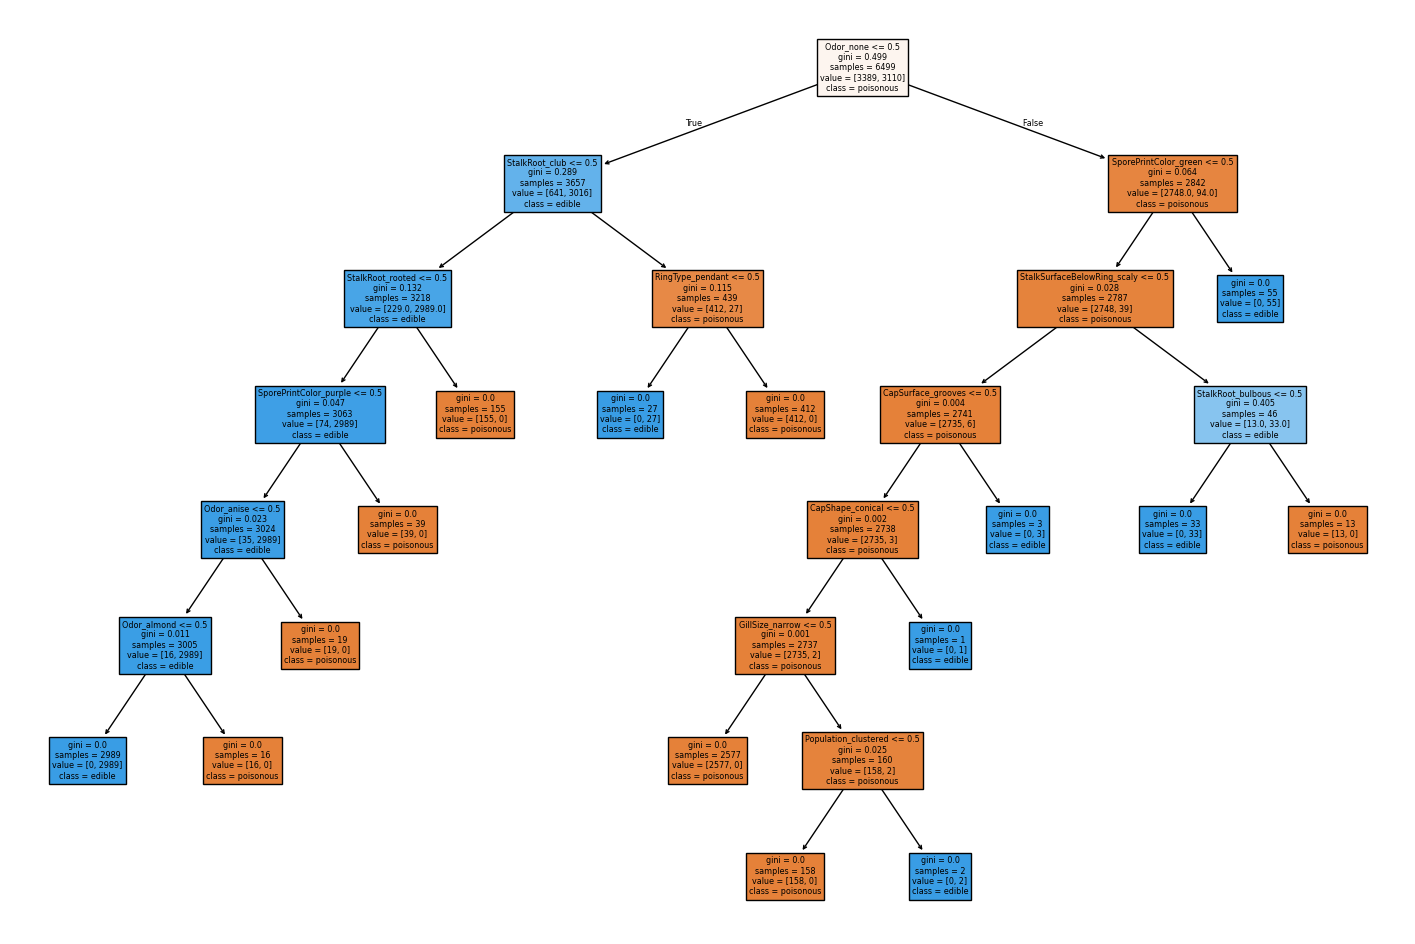

In [17]:
# Crea una figura grande para mostrar el árbol de decisión
fig, ax = plt.subplots(1, figsize=(18, 12))

# Dibuja el árbol de decisión entrenado, con colores rellenos, nombres de características y clases
tree.plot_tree(classifier1, filled=True, feature_names=X.columns, class_names=y.unique())

# Muestra el gráfico generado
plt.show()

**8. Además del gráfico del árbol, generé un gráfico de barras que muestra las variables más importantes que el árbol de decisión usó para hacer sus predicciones. Para facilitar la interpretación, usé el argumento class_names=['Poisonous','Edible'] en la función tree.plot_tree.**

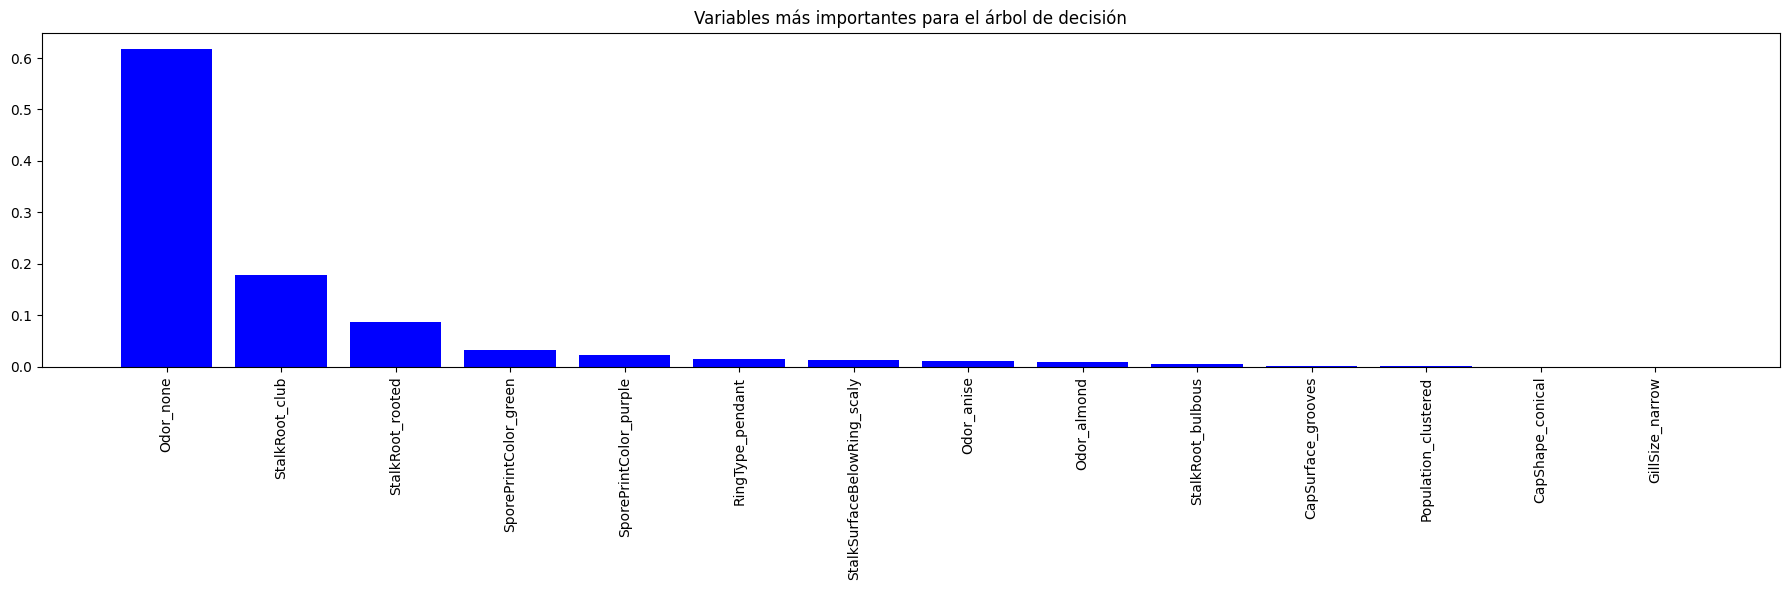

In [18]:
# Obtener la importancia de cada característica según el árbol de decisión
importances = classifier1.feature_importances_

# Ordenar los índices de las características según su importancia de mayor a menor
indices = np.argsort(importances)[::-1]

# Obtener los nombres de las columnas (características)
features = X.columns

# Filtrar solo las variables con importancia mayor a 0
features_importantes = [features[i] for i in indices if importances[i] > 0]

# Número de variables importantes para graficar
n_variables_importantes = len(features_importantes)
x = range(n_variables_importantes)

# Crear figura para el gráfico de barras
plt.figure(figsize=(18, 6))
plt.title("Variables más importantes para el árbol de decisión")

# Graficar barras con la importancia de cada variable
plt.bar(x, importances[indices][:n_variables_importantes], color="blue", align="center")

# Colocar etiquetas con los nombres de variables en el eje x, rotadas 90 grados para mejor lectura
plt.xticks(x, features_importantes, rotation=90)

# Ajustar diseño para evitar que se corten etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

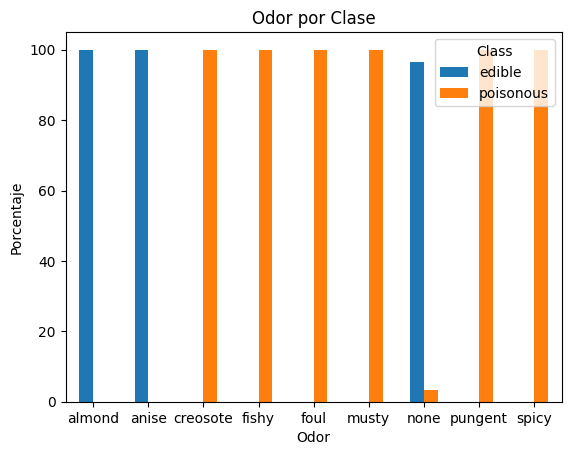

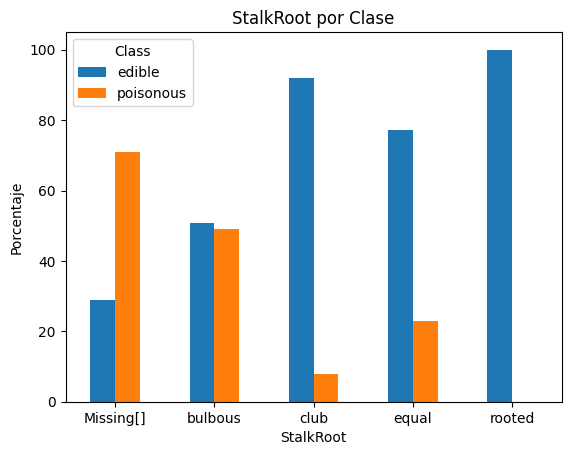

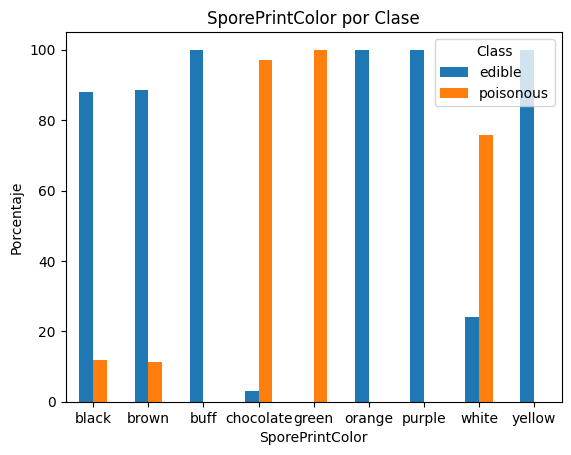

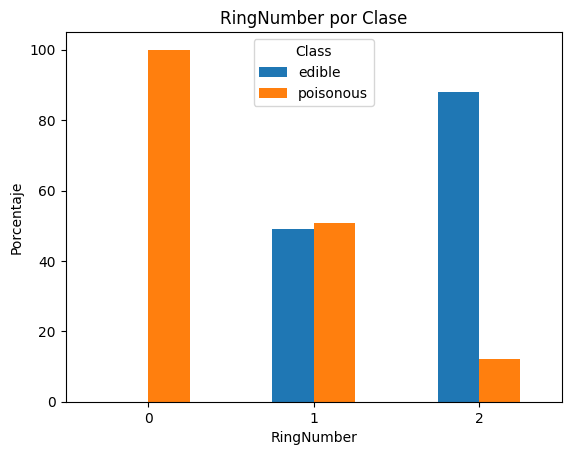

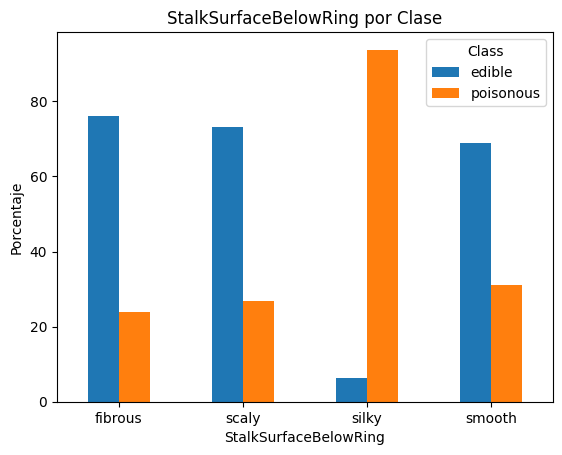

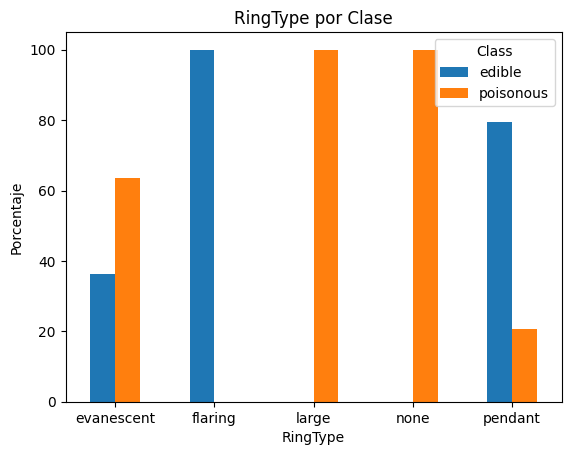

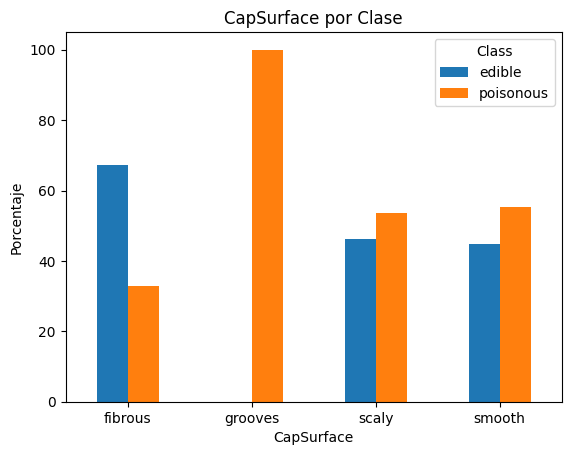

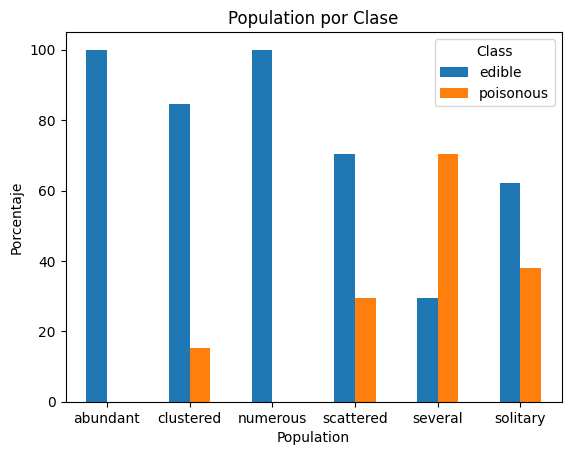

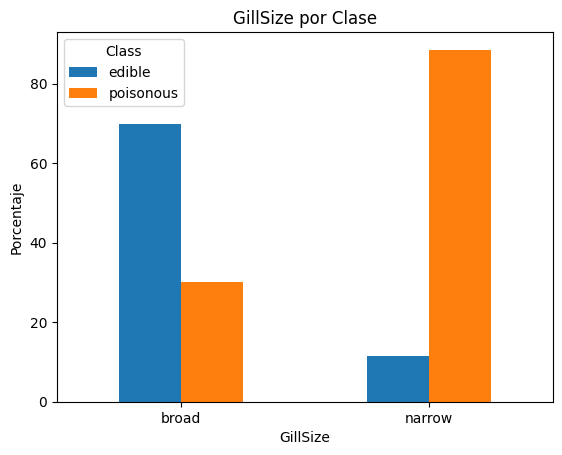

In [19]:
# Lista de columnas categóricas seleccionadas para analizar su relación con la clase
columnas_a_analizar = ['Odor', 'StalkRoot', 'SporePrintColor', 'RingNumber', 'StalkSurfaceBelowRing',
                       'RingType', 'CapSurface', 'Population', 'GillSize']

# Para cada columna en la lista, se crea un gráfico de barras con la distribución porcentual por clase
for columna in columnas_a_analizar:
    # Crea una tabla cruzada normalizada por fila (% de cada categoría dentro de cada valor de la columna)
    crosstab = pd.crosstab(df[columna], df['Class'], normalize='index') * 100

    # Grafica la tabla cruzada como barras
    crosstab.plot.bar()

    # Título del gráfico indicando la columna analizada y su relación con la clase
    plt.title(f'{columna} por Clase')

    # Etiqueta eje x con el nombre de la columna
    plt.xlabel(columna)

    # Etiqueta eje y con porcentaje
    plt.ylabel('Porcentaje')

    # Rota las etiquetas del eje x para mejor lectura (sin rotar en este caso)
    plt.xticks(rotation=0)

    # Muestra el gráfico
    plt.show()

**9. Concluciones**

 Se ve que una de las variables conflictiva el olor, en los graficos de porcentaje se puede ver claramente que los hongos que tienen buen olor son 100% comestibles y los que tienen mal olor son 100% venenosos, pero la variable que entra en conflicto es 'Olor None'. En el arbol de decision se puede ver mas claramente cuales son las variables mas importantes para distinguir si un hongo es venenoso o no. Para sabe si puedo comer un hongo que no tenga olor, tiene que tener 'StalkRoot Club', 'StalkSurfaceBelowRing-Scaly', 'SporePrintColor-Purple', si cumple con todas esas condiciones se puede comer. En el caso contrario, si tiene 'SporePrintColor-Green', 'StalkSurfaceBelowRing-Scaly', 'CupSurface-groover', 'GillSize-narrow', es mejor no comerlo porque lo mas probable es que sea venenoso.

**10. Con los mismos datos de entrenamiento se genera un Bosque Aleatorio que prediga la variable objetivo**

In [20]:
# Entrenamos un modelo Random Forest con profundidad máxima de 3 para evitar sobreajuste
classifier2 = RandomForestClassifier(max_depth=3)

# Ajustamos el modelo con los datos de entrenamiento
classifier2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [21]:
#realizamos una predicción
y_pred = classifier2.predict(X_test)
#evaluamos la matriz de confusión
print(confusion_matrix(y_test, y_pred))

[[819   0]
 [ 22 784]]


In [22]:
#calculamos la precisión del modelo
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9864615384615385


**11. Evaluación  de la precisión del modelo generado y comparación con el modelo arbol de desición generado anteriormente**

 La precision del modelo generado por randomforest nos da alrededor de 98% lo cual es bastante confiable para realizar analisis y predicciones, pero sigue siendo mas bajo que el arbol de desicion que tiene una precision perfecta.

**12. Grafico de barras para el modelo Random Forest generado y en base a este grafico se determina cuales son las variables mas importantes consideradas por el modelo para generar predicciones**

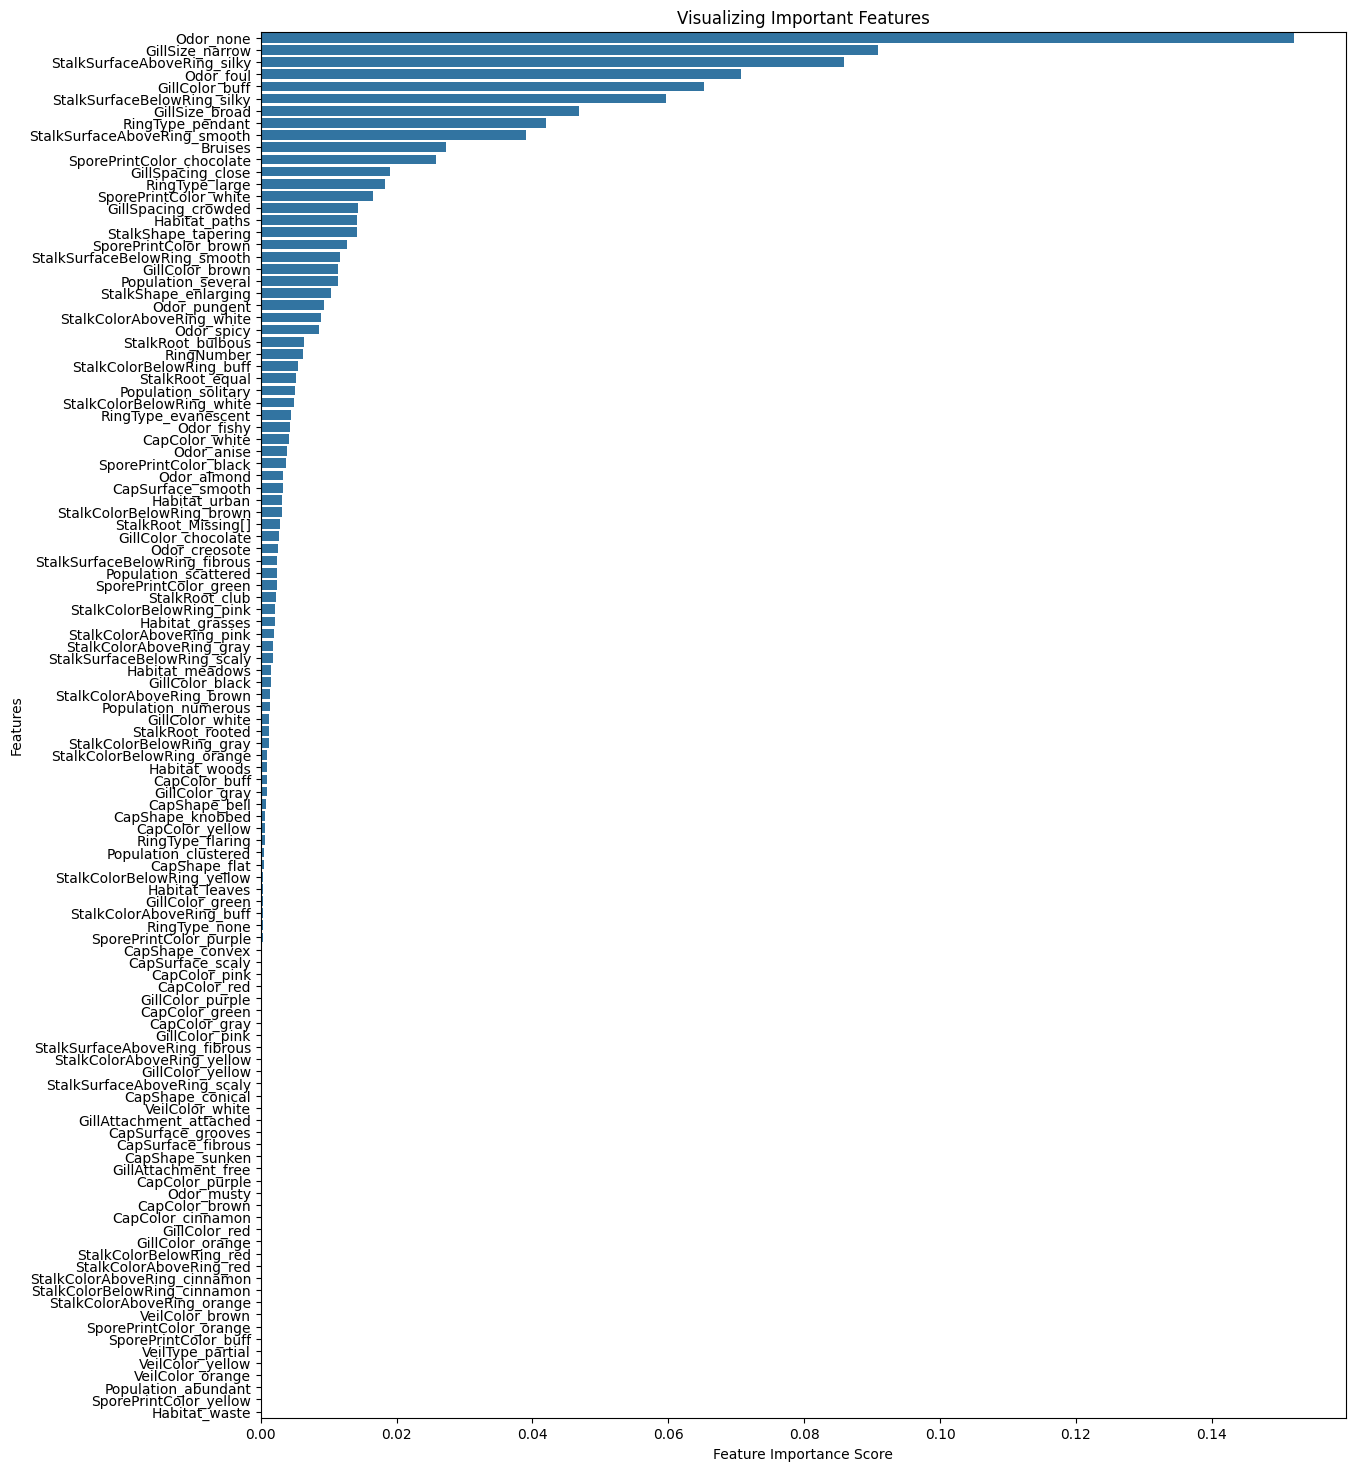

In [23]:
# Calculamos la importancia de cada característica en el modelo Random Forest y las ordenamos de mayor a menor
feature_imp = pd.Series(classifier2.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creamos la figura para el gráfico de barras
ax = plt.subplots(1, figsize=(14, 18))

# Graficamos la importancia de las características usando seaborn
sns.barplot(x=feature_imp, y=feature_imp.index)

# Etiquetas y título del gráfico
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# Mostramos el gráfico
plt.show()


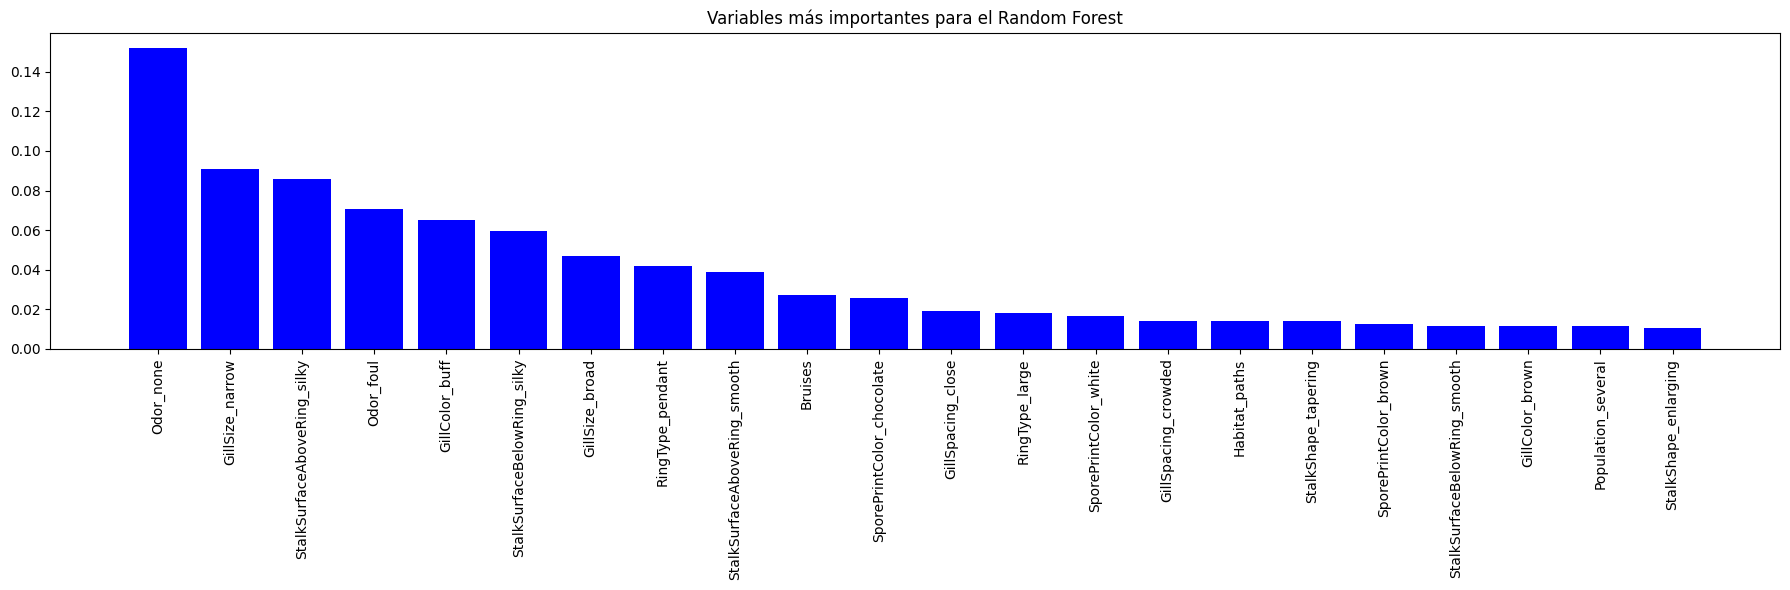

In [24]:
# Obtener la importancia de cada característica según el modelo Random Forest
importances = classifier2.feature_importances_

# Ordenar índices de características de mayor a menor importancia
indices = np.argsort(importances)[::-1]

# Obtener nombres de columnas (características)
features = X.columns

# Filtrar variables con importancia mayor a 0.01 para enfocarse en las más relevantes
features_importantes = [features[i] for i in indices if importances[i] > 0.01]

# Número de variables importantes para graficar
n_variables_importantes = len(features_importantes)
x = range(n_variables_importantes)

# Crear figura para el gráfico de barras
plt.figure(figsize=(18, 6))
plt.title("Variables más importantes para el Random Forest")

# Graficar barras con la importancia de cada variable
plt.bar(x, importances[indices][:n_variables_importantes], color="blue", align="center")

# Etiquetas en eje x con nombres de variables rotadas para mejor lectura
plt.xticks(x, features_importantes, rotation=90)

# Ajustar diseño para evitar que se corten etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**13. ¿Son las mismas variables importantes consideradas por el arbol de decisión entrenado anteriormente? Sepuede generar una tabla para ver los resultados mas claramente con el siguiente codigo:**

In [25]:
# Crear un DataFrame con las características y sus importancias del árbol de decisión, redondeadas a 3 decimales
importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(classifier1.feature_importances_, 3)})

# Ordenar el DataFrame por importancia descendente y establecer la característica como índice
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Mostrar solo las características con importancia mayor a 0
importances[importances['importance'] > 0]

,importance
feature,
Odor_none,0.618
StalkRoot_club,0.179
StalkRoot_rooted,0.087
SporePrintColor_green,0.032
SporePrintColor_purple,0.023
RingType_pendant,0.016
StalkSurfaceBelowRing_scaly,0.014
Odor_anise,0.012
Odor_almond,0.010


In [27]:
# Crear un DataFrame con las características y sus importancias del modelo Random Forest, redondeadas a 3 decimales
importances2 = pd.DataFrame({'feature': X.columns, 'importance2': np.round(classifier2.feature_importances_, 3)})

# Ordenar el DataFrame por importancia descendente y establecer la característica como índice
importances2 = importances2.sort_values('importance2', ascending=False).set_index('feature')

# Mostrar solo las características con importancia mayor a 0.01
importances2[importances2['importance2'] > 0.01]

,importance2
feature,
Odor_none,0.152
GillSize_narrow,0.091
StalkSurfaceAboveRing_silky,0.086
Odor_foul,0.071
GillColor_buff,0.065
StalkSurfaceBelowRing_silky,0.060
GillSize_broad,0.047
RingType_pendant,0.042
StalkSurfaceAboveRing_smooth,0.039


**13. Concluciones**

 Al generar un bosque aleatorio la precision disminuye un poco, alrededor de un 3%, lo que se podria considerar casi insignificante, sin embargo se consideran otras variables importantes, sin embargo sigue prevalecioendo 'Olor None', por lo que se podria considerar que el olor es la variable mas importante al momento de distinguir un la clase de un hongo y el resto de variables solo son variables complementarias.

**14. Ahora volvamos atras, en el dataframe original (df) se agrega una columna llamada 'Odor_Type' la cual clasifique los olores "desagradables" con -1, los neutros con 0 y los agradables con 1, para esto puede utilizar el siguiente diccionario:**

In [29]:
# Crear una copia del DataFrame original para no modificarlo directamente
df2 = df.copy()

# Definir un diccionario para mapear tipos de olor a valores numéricos (ej. olor desagradable = -1, agradable = 1, neutro = 0)
odor_mapping = {'pungent': -1, 'foul': -1, 'creosote': -1, 'fishy': -1, 'spicy': -1, 'musty': -1, 'almond': 1, 'anise': 1, 'none': 0}

# Crear una nueva columna 'Odor_Type' aplicando el mapeo definido sobre la columna 'Odor'
df2['Odor_Type'] = df2['Odor'].map(odor_mapping)

# Mostrar el nuevo DataFrame con la columna añadida
df2

,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,StalkShape,...,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat,Class,Odor_Type
0,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,...,white,partial,white,1,pendant,black,scattered,urban,poisonous,-1
1,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,...,white,partial,white,1,pendant,brown,numerous,grasses,edible,1
2,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,...,white,partial,white,1,pendant,brown,numerous,meadows,edible,1
3,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,...,white,partial,white,1,pendant,black,scattered,urban,poisonous,-1
4,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,...,white,partial,white,1,evanescent,brown,abundant,grasses,edible,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,False,none,attached,close,broad,yellow,enlarging,...,orange,partial,orange,1,pendant,buff,clustered,leaves,edible,0
8120,convex,smooth,brown,False,none,attached,close,broad,yellow,enlarging,...,orange,partial,brown,1,pendant,buff,several,leaves,edible,0
8121,flat,smooth,brown,False,none,attached,close,broad,brown,enlarging,...,orange,partial,orange,1,pendant,buff,clustered,leaves,edible,0
8122,knobbed,scaly,brown,False,fishy,free,close,narrow,buff,tapering,...,white,partial,white,1,evanescent,white,several,leaves,poisonous,-1


**15. Se repita el proceso realizado desde los puntos 2 al 13, pero con df con la columna 'Odor_Type' agregada, ¿Existen diferencias en los resultados obtenidos? ¿Cuales? ¿Por qué cree que se dieron estos resultados? esto contradice y reafirma el conocimiento previo que tenia con respecto a los datos?**

In [30]:
#2. separamos entre vaiables predictoras y objetivo
X = df2.drop('Class', axis=1)
y = df2['Class']
#3. transforma las varibles categoricas del dataset X a variables dummy con el siguiente codigo: X = pd.get_dummies(X)
X = pd.get_dummies(X)
#4. Con las variables predictoras y objetivo separadas separe el dataset en un conjunto de datos de entrenamiento y test en una proporción 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#5. Entrene un modelo de arbol de desición con la data train y evalue su precision(accuracy)
classifier3 = DecisionTreeClassifier()
classifier3.fit(X_train, y_train)
classifier3.score(X_test, y_test)

1.0

In [31]:
#6. Genera la matriz de confusión de su modelo en interprete los resultados de la matriz
y_pred = classifier3.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[826   0]
 [  0 799]]


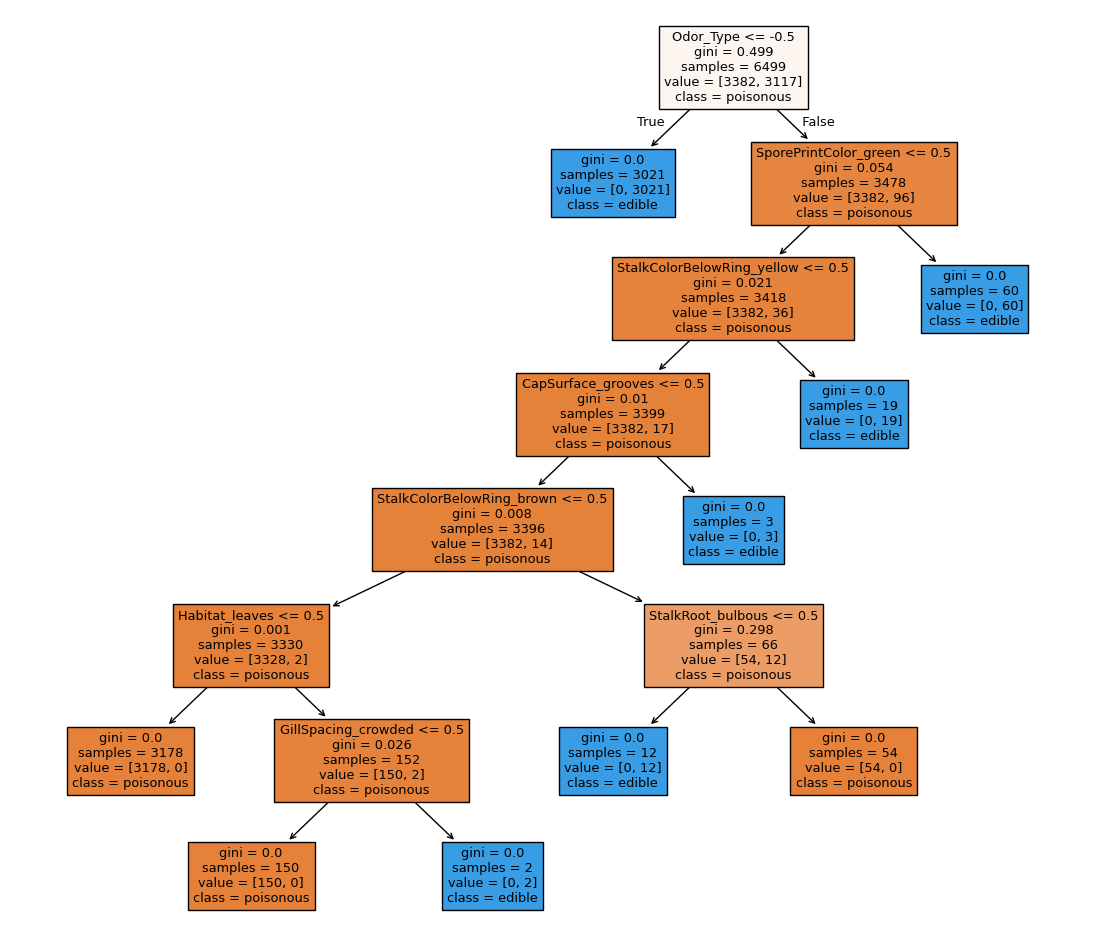

In [32]:
#7. Genere un grafico a partir de su arbol de desición(tree_plot) e inspeccione que variables fuerón consideradas como las más importantes de su modelo
fig, ax = plt.subplots(1, figsize=(14, 12))
tree.plot_tree(classifier3, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()

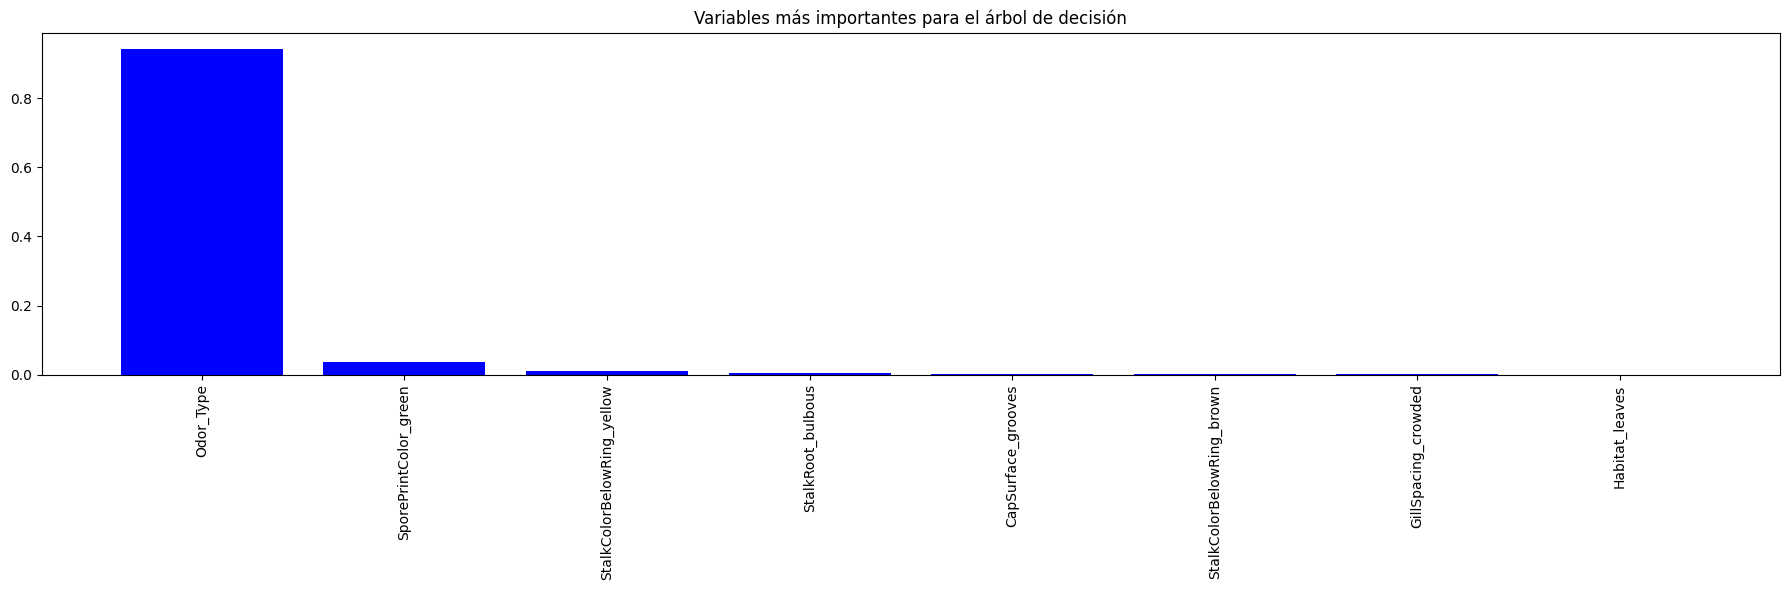

In [33]:
#8. Ademas del grafico anterior genere un grafico de barras en el cual se muestren las variables mas importantes
#consideradas por el arbol de decisión para generar sus predicciones, use como argumento 'class_names=['Poisonous','Edible']'
#en la función tree_plot para viasualizar e interpretar de manera mas clara sus resultados

importances = classifier3.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Filtrar variables con importancia 0
features_importantes = [features[i] for i in indices if importances[i] > 0]

# Ajustar el número de barras y nombres de variables
n_variables_importantes = len(features_importantes)
x = range(n_variables_importantes)
plt.figure(figsize=(18, 6))
plt.title("Variables más importantes para el árbol de decisión")
plt.bar(x, importances[indices][:n_variables_importantes], color="blue", align="center")
plt.xticks(x, features_importantes, rotation=90)
plt.tight_layout()
plt.show()


In [34]:
#10. Con los mismos datos de entrenamiento genere un Bosque Aleatorio que prediga la variable objetivo
classifier4 = RandomForestClassifier(max_depth=3)
classifier4.fit(X_train, y_train)

#realizamos una predicción
y_pred = classifier4.predict(X_test)
#evaluamos la matriz de confusión
print(confusion_matrix(y_test, y_pred))


[[826   0]
 [ 24 775]]


In [35]:
#calculamos la precisión del modelo
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9852307692307692


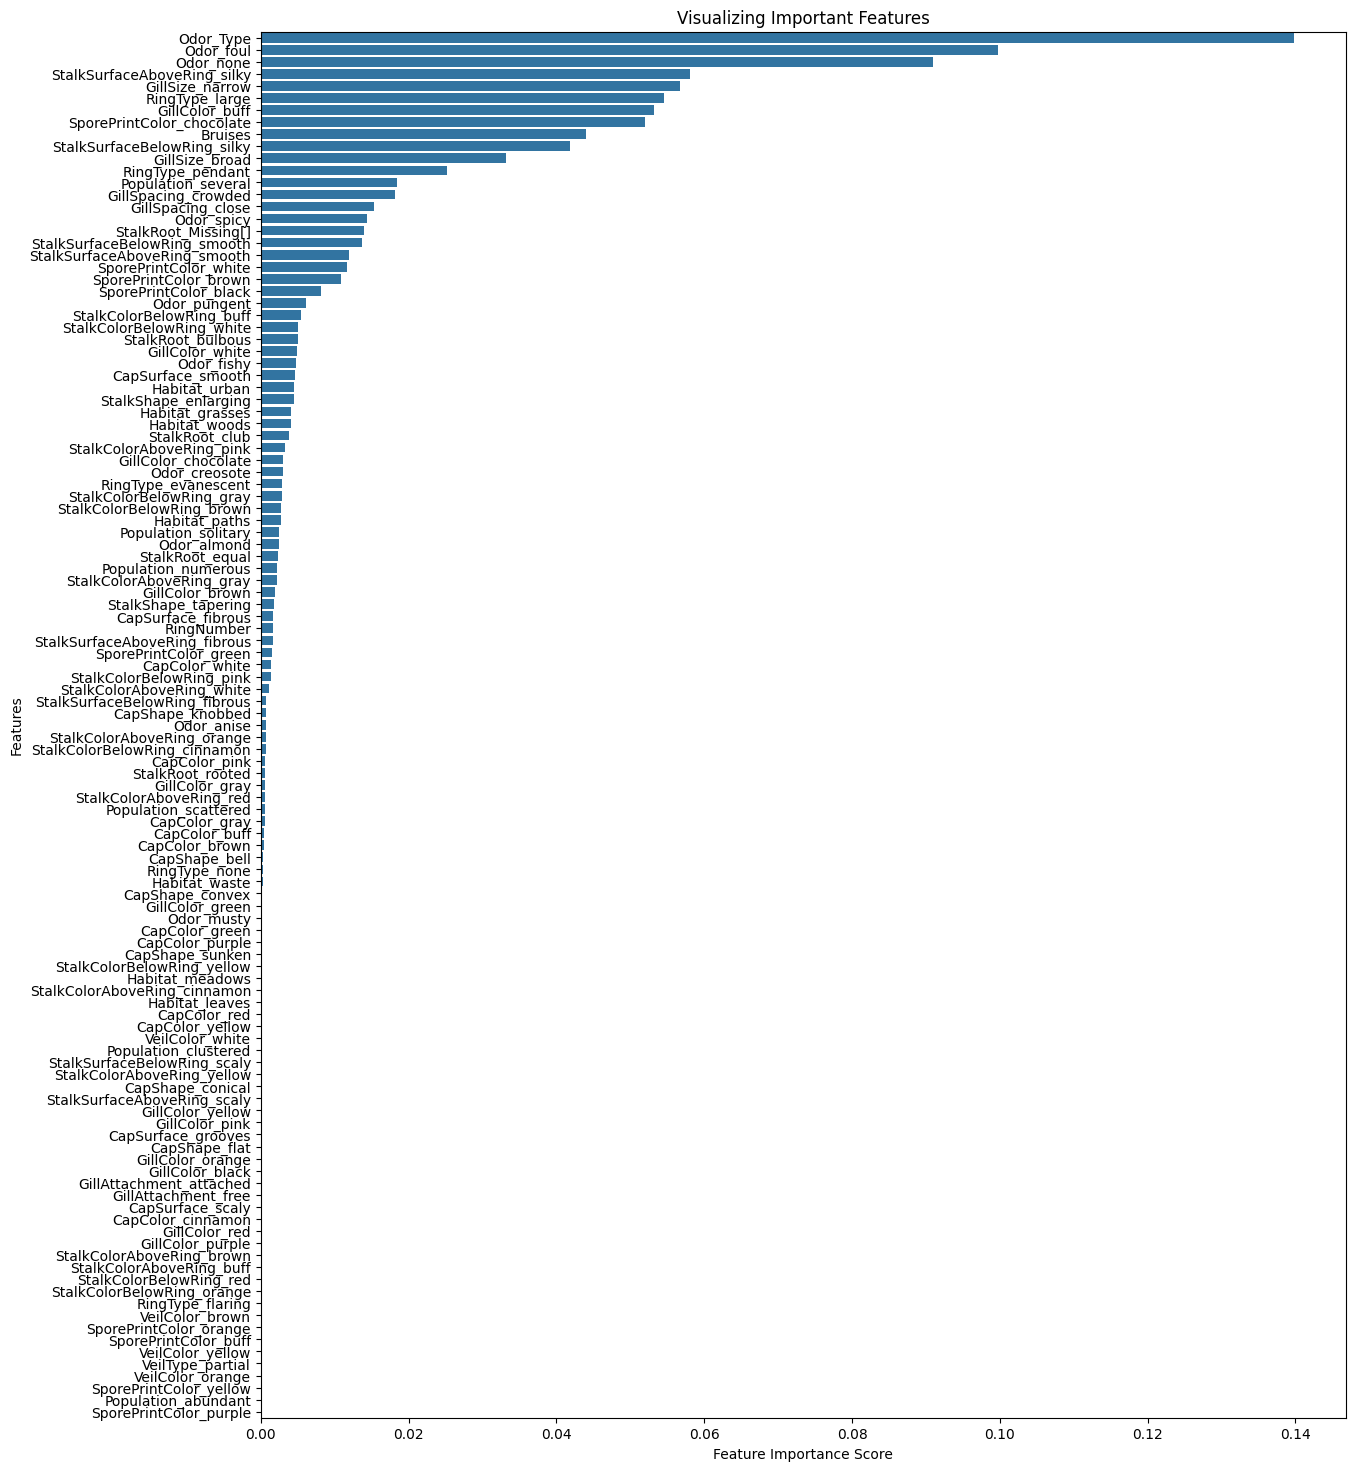

In [36]:
#12. Realice un grafico de barras para el modelo Random Forest generado y en base a este grafico determine cuales
#son las variables mas importantes consideradas por el modelo para generar predicciones

#ahora haremos un grafico de barras para determinar las caracteristicas mas importantes del random forest
feature_imp = pd.Series(classifier4.feature_importances_, index=X.columns).sort_values(ascending=False)
ax = plt.subplots(1, figsize=(14, 18))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

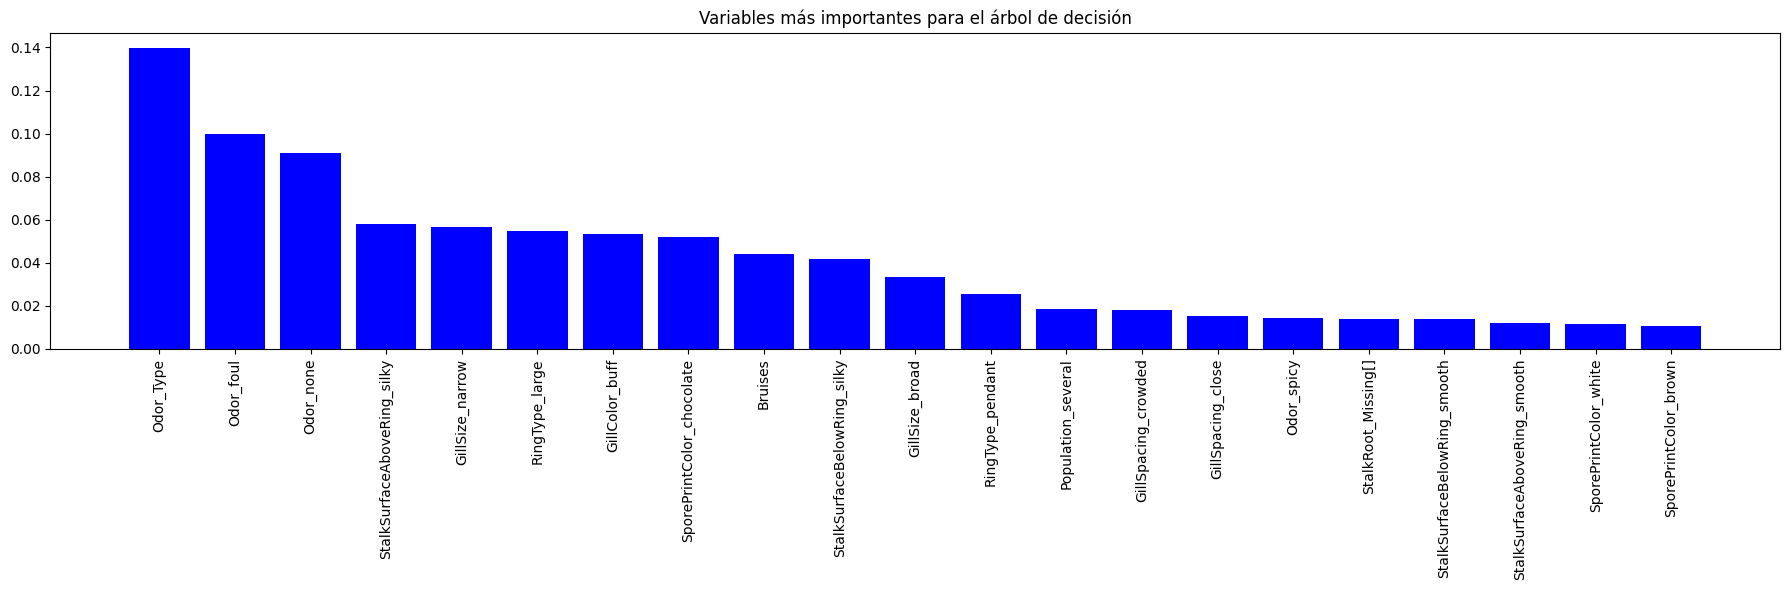

In [37]:
importances = classifier4.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Filtrar variables con importancia 0
features_importantes = [features[i] for i in indices if importances[i] > 0.01]

# Ajustar el número de barras y nombres de variables
n_variables_importantes = len(features_importantes)
x = range(n_variables_importantes)
plt.figure(figsize=(18, 6))
plt.title("Variables más importantes para el árbol de decisión")
plt.bar(x, importances[indices][:n_variables_importantes], color="blue", align="center")
plt.xticks(x, features_importantes, rotation=90)
plt.tight_layout()
plt.show()

In [39]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(classifier3.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances[importances['importance'] > 0]

,importance
feature,
Odor_Type,0.942
SporePrintColor_green,0.036
StalkColorBelowRing_yellow,0.012
StalkRoot_bulbous,0.006
CapSurface_grooves,0.002
StalkColorBelowRing_brown,0.001
GillSpacing_crowded,0.001


In [40]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(classifier4.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances[importances['importance'] > 0]

,importance
feature,
Odor_Type,0.140
Odor_foul,0.100
Odor_none,0.091
StalkSurfaceAboveRing_silky,0.058
GillSize_narrow,0.057
...,...
CapColor_gray,0.001
CapShape_knobbed,0.001
CapColor_white,0.001



**16. Conclución sobre los resultados obtenidos**

Al poder resumir las variables de la columna Olor a mal, sin y buen olor, podemos volver a confirmar que el olor es una de las caracteristicas principales para distingir si un hongo es venenosos o no lo es, sin embargo los hongos sin olor siguen generando cierta incertidumbre, por lo que es importante considerar las variables o caracteristicas complementarias que muestra el arbol de desicion, por ejemplo que el hongo tenga esporas de color verde indica que es un hongo venenoso. Cade destacar que al utilizar la columna OdorType el arbol de desicion de vuelve mucho mas breve en relacion a los olores agradable.